<a href="https://colab.research.google.com/github/michaelgodoyf/tareas-proc-digi-multimedia/blob/main/Actividad_3_godoy_ferreira_michael_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


In [10]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 286 (delta 32), reused 45 (delta 12), pack-reused 219
Receiving objects: 100% (286/286), 9.18 MiB | 31.65 MiB/s, done.
Resolving deltas: 100% (126/126), done.


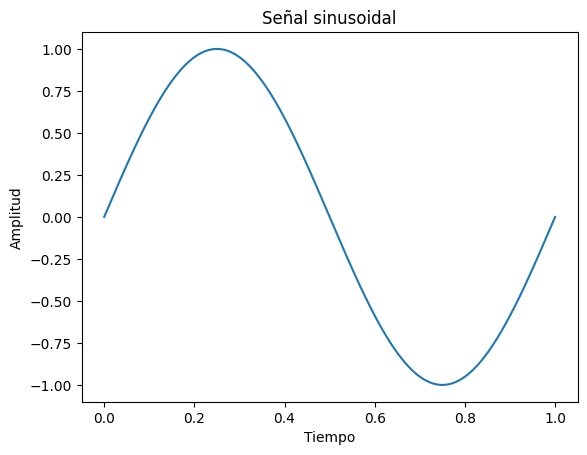

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 1
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase)
plt.plot(t, fn)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal sinusoidal')
plt.show()


Text(0.5, 1.0, '(X + Y)')

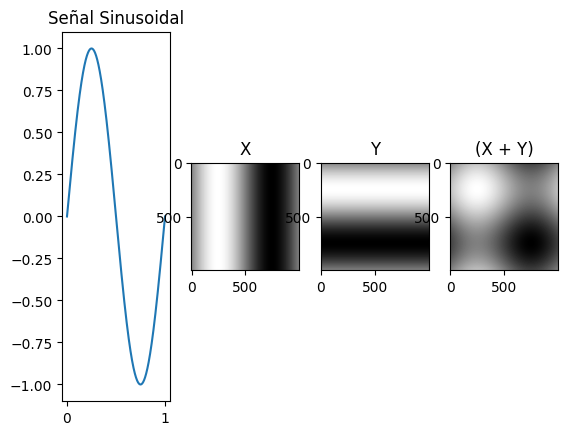

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal sinusoidal
f = 1            # Frecuencia de la señal sinusoidal en Hz
A = 1            # Amplitud de la señal sinusoidal
fs = 1000        # Frecuencia de muestreo en Hz
desfase = 0      # Desfase inicial de la señal
t_i = 0          # Tiempo inicial de la señal en segundos
t_f = 1          # Tiempo final de la señal en segundos

# Genera una secuencia de tiempo equiespaciada entre t_i y t_f con una frecuencia de muestreo de fs
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))

# señal sinusoidal en el dominio temporal
fn = A * np.sin(2 * np.pi * f * t + desfase)

# matrices bidimensionales usando np.meshgrid
x, y = np.meshgrid(t, t)

#  señales sinusoidales bidimensionales para las dimensiones x e y
sin = A * np.sin(2 * np.pi * f * x + desfase)
sin_2 = A * np.sin(2 * np.pi * f * y + desfase)


plt.subplot(1, 4, 1)
plt.plot(t, fn)
plt.title('Señal Sinusoidal')

plt.subplot(1, 4, 2)
plt.imshow(sin, cmap="gray")
plt.title('X')
plt.subplot(1, 4, 3)
plt.imshow(sin_2, cmap="gray")
plt.title('Y')

plt.subplot(1, 4, 4)
plt.imshow(sin + sin_2, cmap="gray")
plt.title('(X + Y)')


## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


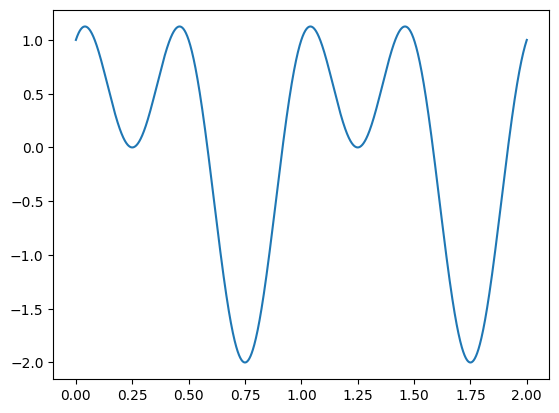

In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 2
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn= A * np.sin(2 * np.pi * f * t + desfase) + A * np.cos(2*(2 * np.pi * f * t + desfase))
plt.plot(t, fn)

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

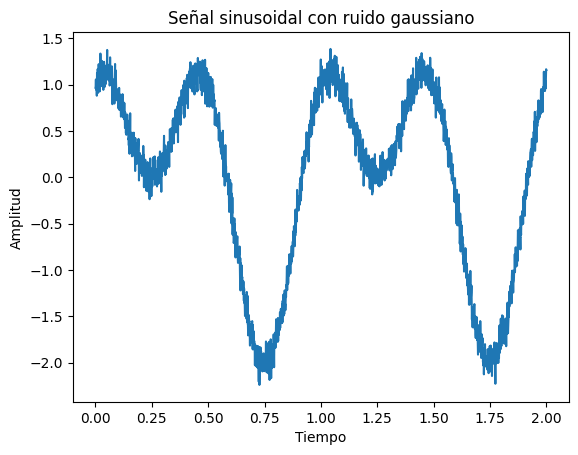

In [16]:
import numpy as np
import matplotlib.pyplot as plt

f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 2
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase) + A * np.cos(2*(2 * np.pi * f * t + desfase))

#  ruido gaussiano
ruido_gaussiano = np.random.normal(0, 0.1, len(t))  # Media 0, desviación estándar 0.1

# Sumar el ruido gaussiano a la señal
fn_con_ruido = fn + ruido_gaussiano

plt.plot(t, fn_con_ruido)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal sinusoidal con ruido gaussiano')
plt.show()



## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


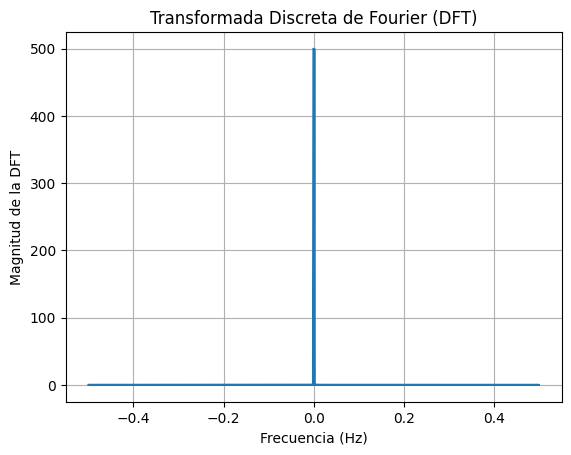

In [8]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def dft(x: List[np.ndarray]) -> List[np.ndarray]:
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] =X[k]+ x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 1
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase)

#  DFT de la señal
DFT = dft(fn)
# las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(DFT))

# Graficar la magnitud de la DFT vs. las frecuencias
plt.plot(frecuencias, np.abs(DFT))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la DFT')
plt.title('Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

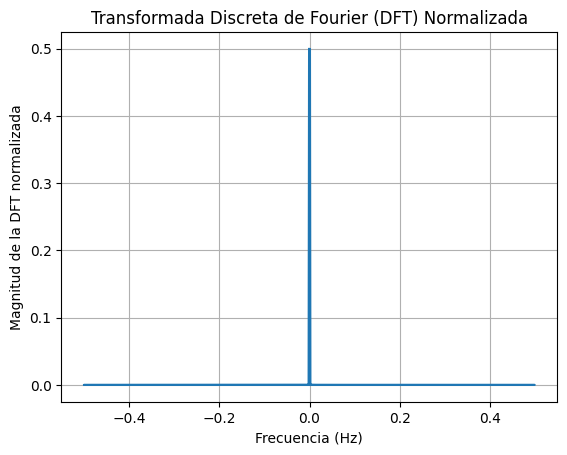

In [45]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def dft(x: List[np.ndarray]) -> List[np.ndarray]:
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 1
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase)

#  DFT de la señal
DFT = dft(fn)

# Normalizar la DFT
DFT_normalizada = DFT / len(fn)

#  frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(DFT))

# Graficar la magnitud de la DFT normalizada vs. las frecuencias
plt.plot(frecuencias, np.abs(DFT_normalizada))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la DFT normalizada')
plt.title('Transformada Discreta de Fourier (DFT) Normalizada')
plt.grid()
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

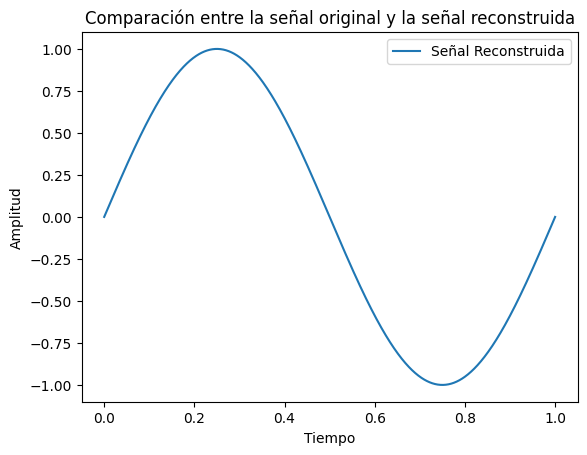

In [44]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def dft_inv(X: List[np.ndarray]) -> List[np.ndarray]:
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

# señal sinusoidal
f = 1
A = 1
fs = 1000
desfase = 0
t_i = 0
t_f = 1
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase)
# la DFT de la señal
DFT = np.fft.fft(fn)
#  DFT inversa de la señal
fn_reconstruida = dft_inv(DFT)
# señal reconstruida después de la DFT inversa
plt.figure()
plt.plot(t, fn_reconstruida.real, label='Señal Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('señal reconstruida')
plt.legend()
plt.show()






### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

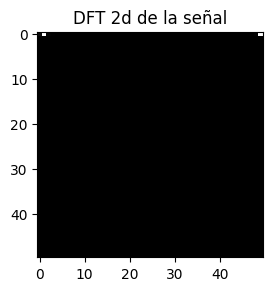

In [7]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def dft_2d(M: List[List[float]]) -> np.ndarray:
    K, L = len(M), len(M[0])
    J = np.zeros((K, L), dtype=complex)
    for u in range(K):
        for C in range(L):
            for W in range(K):
                for P in range(L):
                    J[u, C] += M[W][P] * np.exp(-2j * np.pi * ((u * W / K) + (C * P / L)))
    return J

f = 1
A = 1
fs = 50
desfase = np.pi / 2
t_i = 0
t_f = 1
t = np.linspace(t_i, t_f, int((t_f - t_i) * fs))
fn = A * np.sin(2 * np.pi * f * t + desfase)
x, y = np.meshgrid(t, t)
#  señal sinusoidal
sin_x = A * np.sin(2 * np.pi * f * x + desfase)
#  DFTs 2D de la señal
dft_x = dft_2d(sin_x)
# Mostrar las magnitudes de las DFTs
plt.subplot(1, 2, 1)
plt.imshow(abs(dft_x), cmap='gray')
plt.title('DFT 2d de la señal')

plt.show()



### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

 En el dominio temporal, el ruido afectará la forma de la señal y su amplitud. En el dominio frecuencial, la Transformada de Fourier de esta señal con ruido mostrará una distribución de energía que incluye las frecuencias presentes en la señal original, así como cualquier componente de frecuencia adicional introducido por el ruido. La cantidad y la ubicación de estos componentes adicionales dependerán de la naturaleza y la intensidad del ruido aplicado.


Los resultados de la Transformada de Fourier (DFT) para estos casos nos proporcionará información sobre la distribución de frecuencias en la señal. Para la señal sinusoidal original, la DFT mostrará un pico en una frecuencia específica correspondiente a la frecuencia de la onda sinusoidal. Sin embargo, cuando se agrega ruido a la señal, la DFT mostrará la distribución de energía en el dominio de la frecuencia, lo que incluirá componentes de frecuencia adicionales debido al ruido.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html